### In this kernel i will be doing an Explorative data analysis and also build machine learning model on an unnamed company trying to control the attrition employee. The data has  the following features:
<ul>
    <li> Time spent at the company
        <li>work accident
            <li>Number of projects
                <li>Average monthly hours
                    <li>Satisfaction Level
                        <li>Last evaluation
                            <li>Salary
                                <li>Departments
                                    <li>Whether the employee has left
                                       <li>have had a promotion in the last 5 years
 
## The goal  is predict what type of employees that are leaving and also figure out which features have direct impact on employee rentention and attrittion.

In [267]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import Perceptron
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import mean_squared_error
import os
os.chdir('C:\\Users\\Nwele\\Desktop\\Excel _new')


In [268]:
# loading  Excel sheets. The Excel file contains two sheets
df_sheet_1=pd.read_excel('Hash-Analytic-Python-Analytics-Problem-case-study-1.xlsx',sheet_name='Existing employees')
df_sheet_2=pd.read_excel('Hash-Analytic-Python-Analytics-Problem-case-study-1.xlsx',sheet_name='Employees who have left')


In [269]:
df_sheet_1['left']=1 # Creating a new feature 'left' and assigning the value 1 for employeers who did not leave 
df_sheet_2['left']=0 #assigning employer who left the value 0

In [270]:
#joining the two sheets together
data=pd.concat([df_sheet_1,df_sheet_2],axis=0)

In [271]:
data.sample(10) #sampling the data

,Emp ID,satisfacti,last_eval,number_,average_,time_spe,Work_acc,promotio,dept,salary,left
10793,13576.0,0.91,0.77,3.0,144.0,3.0,0.0,0.0,sales,medium,1
6373,8373.0,0.36,0.56,6.0,242.0,6.0,0.0,0.0,support,medium,1
4684,6684.0,0.51,0.50,2.0,235.0,2.0,0.0,0.0,technical,medium,1
1403,3403.0,0.55,0.79,3.0,162.0,2.0,0.0,0.0,technical,low,1
2103,4103.0,0.15,0.61,3.0,146.0,6.0,1.0,0.0,technical,medium,1
1165,1166.0,0.10,0.96,6.0,303.0,4.0,0.0,0.0,sales,low,0
110,111.0,0.43,0.47,2.0,144.0,3.0,0.0,0.0,hr,medium,0
487,2487.0,0.49,0.50,4.0,187.0,5.0,1.0,0.0,support,medium,1
5610,7610.0,0.85,0.75,3.0,214.0,3.0,0.0,0.0,support,medium,1
9208,11208.0,0.49,0.65,4.0,233.0,7.0,0.0,0.0,sales,medium,1


In [272]:
#renaming the columns  for better understanding of each features
data=data.rename(columns={'satisfacti':'Satisfaction Level','last_eval':'last evaluation','promotio':'promotion',
                         'time_spe':'time_spent','number_':'Number of projects','Work_acc':'work_accident','average_':'average_monthly_hour'})

In [273]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15000 entries, 0 to 3570
Data columns (total 11 columns):
Emp ID                  14999 non-null float64
Satisfaction Level      14999 non-null float64
last evaluation         14999 non-null float64
Number of projects      14999 non-null float64
average_monthly_hour    14999 non-null float64
time_spent              14999 non-null float64
work_accident           14999 non-null float64
promotion               14999 non-null float64
dept                    14999 non-null object
salary                  15000 non-null object
left                    15000 non-null int64
dtypes: float64(8), int64(1), object(2)
memory usage: 1.4+ MB


#### The data contains 15000 entries and and 10 featueres, 7 float64, 1 int64, 2 objects

In [274]:
data.isnull().sum()

Emp ID                  1
Satisfaction Level      1
last evaluation         1
Number of projects      1
average_monthly_hour    1
time_spent              1
work_accident           1
promotion               1
dept                    1
salary                  0
left                    0
dtype: int64

In [275]:
 # the EmpID is not useful in this analysis so i will be drop it.
data=data.drop('Emp ID',axis=1)

In [62]:
data.describe()

,Satisfaction Level,last evaluation,Number of projects,average_monthly_hour,time_spent,work_accident,promotion,left
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,15000.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.021268,0.761933
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.144281,0.425914
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,1.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,1.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,1.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


## From the above we will observe that :
<ul>
    <li> approximately 76 percent of the employee did not leave
    <li> the minimum average monthly hours is 96, the maximum monthly work hour is 310 hours and 75% of employeee work below average monthly hours is 245 
    <li> Average monthly hour spent by employers is approximately 201
    <li> there is signficant deviation in monthly hours spent by employers
 <ul1>

In [63]:
data.describe(include='O')

,dept,salary
count,14999,15000
unique,10,4
top,sales,low
freq,4140,7316


### <li> Most employers are low salary earners, almost 49%
   

In [64]:
#splitting the data into categorical and numerical features

categorical_col=[feature for feature in data.columns if data[feature].dtype=='O' or data[feature].nunique()<3]
numerical_col=[feature for feature in data.columns if data[feature].dtypes in ['int64','float64']and data[feature].nunique()>3] 
numerical_col

['Satisfaction Level',
 'last evaluation',
 'Number of projects',
 'average_monthly_hour',
 'time_spent']

## Data Exploration  With Charts

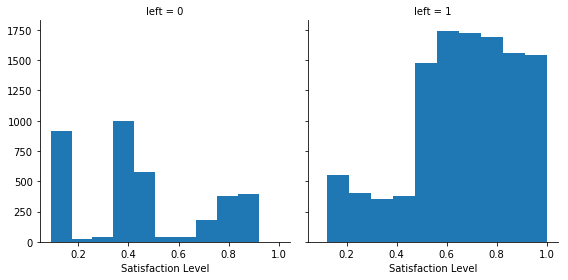

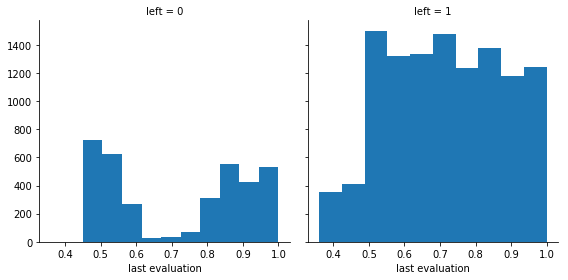

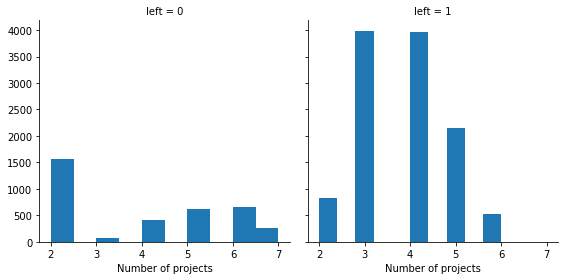

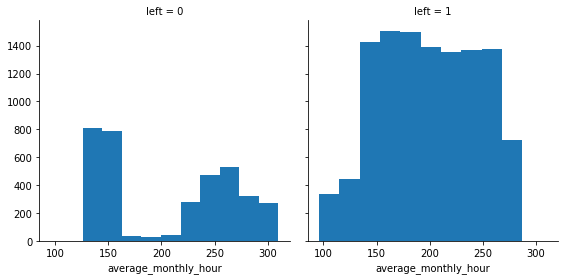

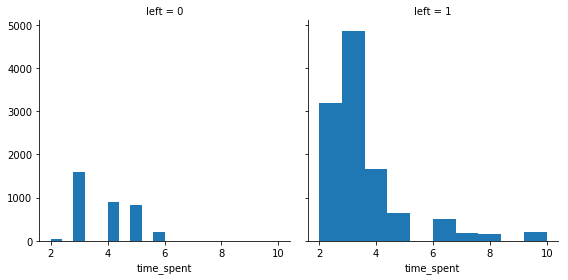

In [65]:
for feature in numerical_col:
    plot=sns.FacetGrid(data,col='left',height=4)
    plot.map(plt.hist,feature,bins=10)

E:\Ugoandy\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


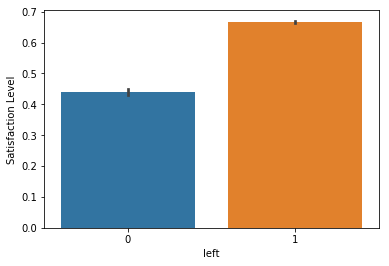

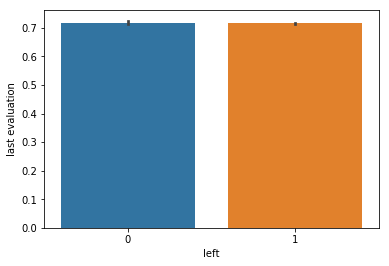

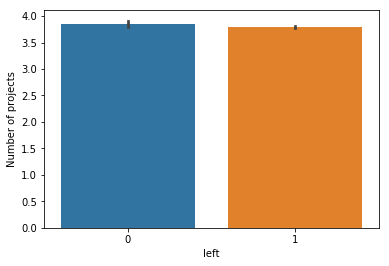

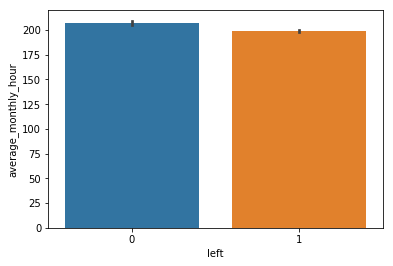

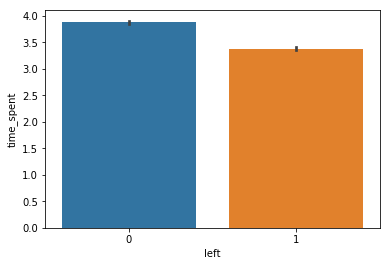

In [277]:
for feature in numerical_col:
    if feature=='left':
        pass
    else:
        sns.barplot(data['left'],data[feature])
        plt.show()

### Observations
From the following we could observe that :
<ul>
<Li>there is relatively low satisfaction level for employees that left the firm against retained employees
<Li>There is high Average monthly hours of work for employee that left the firm
<li>few employees with work accident left
<li>last 5 years promotion has little effect on employee attrition effect.
<li>Number of projects has no effect on retention of workers
<li>Last evaluation has no effect on retention

In [ ]:

data.groupby('left').mean()

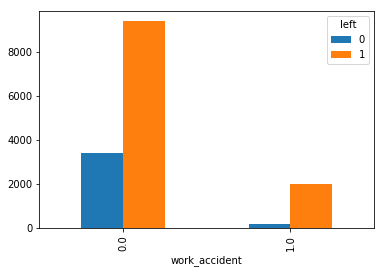

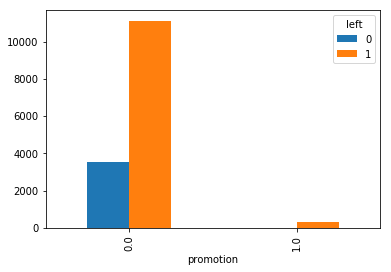

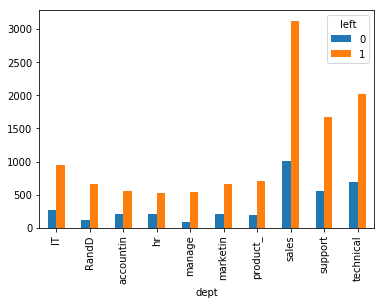

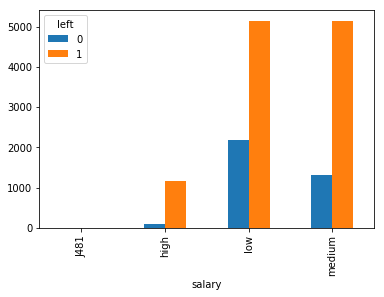

In [67]:
for feature in categorical_col:
    if feature=='left':
        pass
    else:
        pd.crosstab(data[feature],data['left']).plot.bar()

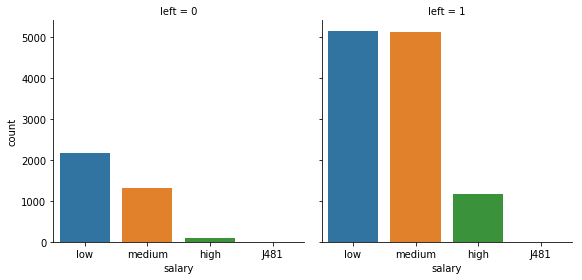

In [68]:
sns.catplot(x='salary',col='left',kind='count',data=data,height=4)
    

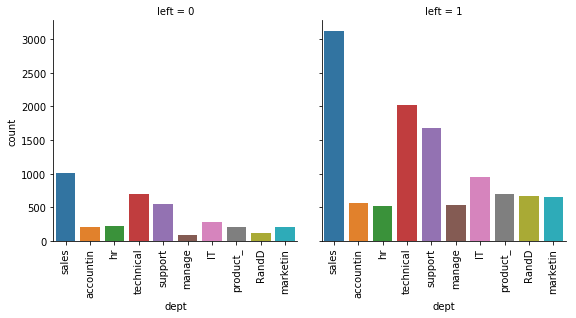

In [69]:
g=sns.catplot(x='dept',col='left',kind='count',data=data,height=4)
for axes in g.axes.flat:
    axes=axes.set_xticklabels(axes.get_xticklabels(),rotation=90)

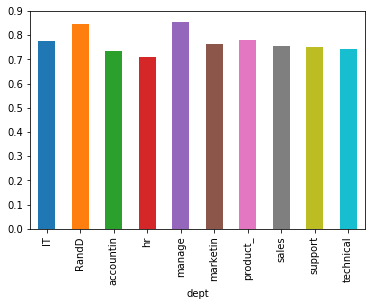

In [70]:
data.groupby('dept').mean()['left'].plot.bar()

### Observations 
<ul>
<li> Most employees are low salary earners 
 <li> few high Salary earners left the firm
  <li> Sales department has the highest employees
     <li> Departments does have much impact on employee rentention
   

### What features have serious impact on  employee rentention?
To me the following have a clear and direct impact on employee rentention:
<li> Average Monthly Hours
    <li> Promotion  last 5 Years 
        <li> Departments has low impact on rentention
            <li>Salary
               <li>work accident
                  <li> time_spend_company
                
                
#### So we are going to Drop the following features:
   <li>last_evaluation
       <li>number_project
          <li>sales

In [284]:
data=data.dropna()

In [285]:
data_selected=data.copy()
data_selected=data_selected.drop(['Number of projects','last evaluation','dept'],axis=1)

In [286]:
data_selected.head()

,Satisfaction Level,average_monthly_hour,time_spent,work_accident,promotion,salary,left
0,0.58,215.0,3.0,0.0,0.0,low,1
1,0.82,202.0,3.0,0.0,0.0,low,1
2,0.45,193.0,3.0,0.0,0.0,low,1
3,0.78,247.0,3.0,0.0,0.0,low,1
4,0.49,214.0,2.0,0.0,0.0,low,1


In [287]:
salary={'low':1,'medium':2,'high':3}

In [288]:
data_selected['salary']=data_selected['salary'].map(salary)

## Model Building

In [289]:
X=data_selected.iloc[:,:-1]
Y=data_selected['left']
X_train,X_test,y_train,y_test=train_test_split(X,Y,test_size=0.2,random_state=0)

## Logistic Model

In [290]:
log_model=LogisticRegression()
log_model.fit(X_train,y_train)
y_pred_log=log_model.predict(X_test)
log_score=log_model.score(X_train,y_train)
print('{} {} {}'.format( 'Accuracy:',np.round(log_score,2)*100,'%'))


Accuracy: 77.0 %



## Random Forest

In [291]:
rand_model=RandomForestClassifier(n_estimators=100)
rand_model.fit(X_train,y_train)
y_rand_model=rand_model.predict(X_test)
rand_score=rand_model.score(X_test,y_test)
print('{} {} {}'.format( 'Accuracy:',np.round(rand_score,2)*100,'%'))

Accuracy: 99.0 %


## Gussian Naive Bayes 

In [292]:
gussian_model=GaussianNB()
gussian_model.fit(X_train,y_train)
y_pred_gussian=gussian_model.predict(X_test)
gussian_score=gussian_model.score(X_test,y_test)
print('{} {} {}'.format( 'Accuracy:',np.round(gussian_score,2)*100,'%'))

Accuracy: 77.0 %


## Svc Linear

In [293]:
Svc_linear_model=LinearSVC()
Svc_linear_model.fit(X_train,y_train)
y_pred_Svc=Svc_linear_model.predict(X_test)
svc_score=Svc_linear_model.score(X_test,y_test)
print('{} {} {}'.format( 'Accuracy:',np.round(svc_score,2)*100,'%'))


Accuracy: 79.0 %


## Decision Tree

In [294]:
tree_model=DecisionTreeClassifier()
tree_model.fit(X_train,y_train)
y_tree_pred=tree_model.predict(X_test)
tree_score=tree_model.score(X_test,y_test)
print('{} {} {}'.format( 'Accuracy:',np.round(tree_score,2)*100,'%'))


Accuracy: 97.0 %


## Perceptron Classifiers

In [295]:
per_model = Perceptron(max_iter=25)
per_model.fit(X_train, y_train)

Y_pred = per_model.predict(X_test)
per_model=per_model.score(X_test,y_test)
print('{} {} {}'.format( 'Accuracy:',np.round(per_model,2)*100,'%'))


Accuracy: 75.0 %


## KNeighbors Classifiers

In [296]:
kn_model=KNeighborsClassifier(n_neighbors=2)
kn_model.fit(X_train,y_train)
y_pred_kn=kn_model.predict(X_test)
kn_score=kn_model.score(X_test,y_test)
print('{} {} {}'.format( 'Accuracy:',np.round(kn_score,2)*100,'%'))


Accuracy: 93.0 %


In [298]:
model_score=pd.DataFrame({'Models':['Logistic Model','Random Forest','Gussian Naive Bayes','Svc Linear','Decision Tree','Perceptron Classifiers','KNeighbors Classifiers'],
             'Scores':[log_score,rand_score,gussian_score,svc_score,tree_score,per_model,kn_score]}).sort_values(by='Scores',ascending=False)
model_score.set_index('Models')
model_score['Scores']=model_score['Scores'].map(lambda x:str(round(x*100))+'%')
model_score

,Models,Scores
1,Random Forest,99%
4,Decision Tree,97%
6,KNeighbors Classifiers,93%
3,Svc Linear,79%
2,Gussian Naive Bayes,77%
0,Logistic Model,77%
5,Perceptron Classifiers,75%


# Better evaluation Using Cross Validation
Random Forest Is the best so far. To evaluate the Random Forest classifier we will be using Sklearn cross validation feature of 15 folds 

In [299]:
from sklearn.model_selection import cross_val_score
scores_evaluated=cross_val_score(rand_model,X_test,y_test,cv=15,scoring='accuracy')

In [300]:
def display_scores(scores_evaluated):
    print("Scores:", scores_evaluated)
    print("Mean:", scores_evaluated.mean())
    print("Standard deviation:", scores_evaluated.std())
display_scores(scores_evaluated)


Scores: [0.98507463 0.96517413 0.97014925 0.96517413 0.99004975 0.960199
 0.975      0.975      0.975      0.9798995  0.99497487 0.97487437
 0.9798995  0.95979899 0.96482412]
Mean: 0.9743394834870873
Standard deviation: 0.010128455506423368


Random forest is giving us an approximate score of 97% with a standard deviation of aproximately 1.01%.This is quite promising

## Saving the Model

In [301]:
from sklearn.externals import joblib
joblib.dump(rand_model, "model_6.pkl")
my_model_loaded = joblib.load("model_6.pkl")

## Feature importance

In [302]:
features_importances = pd.DataFrame({'Features':X_train.columns,'Importance':np.round(rand_model.feature_importances_,3)})
features=features_importances.sort_values(by='Importance',ascending=False).set_index('Features')
features

,Importance
Features,
Satisfaction Level,0.469
time_spent,0.263
average_monthly_hour,0.233
salary,0.017
work_accident,0.014
promotion,0.003


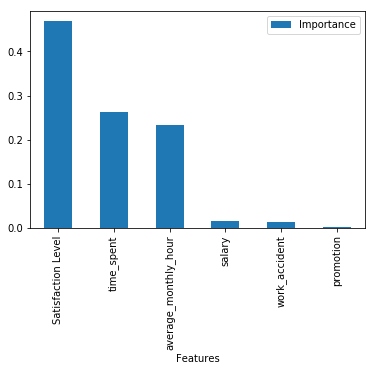

In [303]:
features.plot.bar()

<ul>
        <li> Satisfaction level,time spent average monthly are the most reason for employee attrition.
           <li> salary and work accident do not have too much effect on employee attrition. 
            <li> promotion in the last 5 years doesn't have significant effect in employee attrition comfirming  our ealiar claim during the explorative analysis .

### ...To be continued